In [1]:
#Importing requierd libraries
import pandas as pd
import matplotlib.pyplot as plt

#Importing the dataset

df = pd.read_csv('Mall_Customers.csv')
print(df.head(10))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [2]:
#Renaming names of columns for better understanding and efficient work

df.columns = ["CustomerID", "Gender", "Age", "Annual Income", "Spending Score"]
print(df.head(10))

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40
5           6  Female   22             17              76
6           7  Female   35             18               6
7           8  Female   23             18              94
8           9    Male   64             19               3
9          10  Female   30             19              72


In [3]:
#Data Preprocessing

#1. Check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
#2. Remvoving duplicates if present
df = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB
None


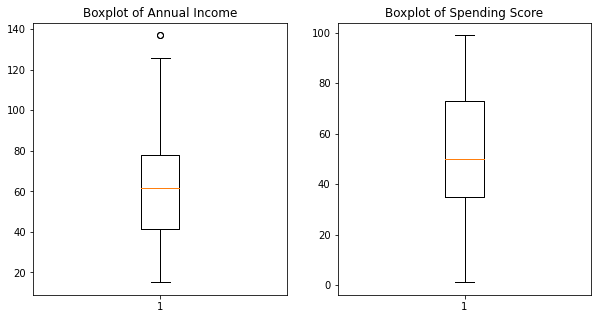

In [5]:
#3. Visualizing Outliers if present

#Boxplot to visualize outliers in Annual Income column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Annual Income'])
plt.title('Boxplot of Annual Income')

#Boxplot to visualize outliers in Spending Score column
plt.subplot(1,2,2)
plt.boxplot(df['Spending Score'])
plt.title('Boxplot of Spending Score')
plt.show()

In [6]:
#Handling Outliers by capping them using IQR method

for col in ['Annual Income']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print(df)

     CustomerID  Gender  Age  Annual Income  Spending Score
0             1    Male   19          15.00              39
1             2    Male   21          15.00              81
2             3  Female   20          16.00               6
3             4  Female   23          16.00              77
4             5  Female   31          17.00              40
..          ...     ...  ...            ...             ...
195         196  Female   35         120.00              79
196         197  Female   45         126.00              28
197         198    Male   32         126.00              74
198         199    Male   32         132.75              18
199         200    Male   30         132.75              83

[200 rows x 5 columns]


In [7]:
#Data Transformation(Converting categorical variables into numerical forms)

df['Gender'] = df['Gender'].map({'Male' : 0, "Female" : 1})
print(df.head(10))

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1       0   19           15.0              39
1           2       0   21           15.0              81
2           3       1   20           16.0               6
3           4       1   23           16.0              77
4           5       1   31           17.0              40
5           6       1   22           17.0              76
6           7       1   35           18.0               6
7           8       1   23           18.0              94
8           9       0   64           19.0               3
9          10       1   30           19.0              72


In [8]:
#Exporting Dataset into CSV File
df.to_csv('cleaned_mall_customers.csv', header=True, index=False)